# 1_loading_visualizing_data

### > Importing Required Libraries

In [19]:
#load all the required library: matplotlib, tensorflow, numpy, scipy, sklearn, pickle
from utils import *

# Machine precision (to avoid division by zero)
EPS = np.finfo(float).eps 

### > Loading Data

In [20]:
#load raw data from the _raw_data directory
eigs19branches = np.load("_raw_data/19Branches_all_eigs.npy")
print(eigs19branches)

print(f"We have {eigs19branches.shape[0]} number of scenarios, \
each with {eigs19branches.shape[1]} eigenvalues")

[[-5.00000000e+01+0.j -1.00000000e+03+0.j -5.00000000e+01+0.j ...
  -1.01802508e+00+0.j -1.00000000e+00+0.j -5.13578797e+00+0.j]
 [-5.00000000e+01+0.j -1.00000000e+03+0.j -5.00000000e+01+0.j ...
  -1.01802508e+00+0.j -1.00000000e+00+0.j -5.13578797e+00+0.j]
 [-5.00000000e+01+0.j -1.00000000e+03+0.j -5.00000000e+01+0.j ...
  -1.01802508e+00+0.j -1.00000000e+00+0.j -5.13578797e+00+0.j]
 ...
 [-5.00000000e+01+0.j -1.00000000e+03+0.j -3.02410064e+01+0.j ...
  -5.13578797e+00+0.j  0.00000000e+00+0.j -1.94250194e-01+0.j]
 [-5.00000000e+01+0.j -1.00000000e+03+0.j -5.00000000e+01+0.j ...
  -1.01802508e+00+0.j -1.00000000e+00+0.j -5.13578797e+00+0.j]
 [-5.00000000e+01+0.j -1.00000000e+03+0.j -5.00000000e+01+0.j ...
  -1.01802508e+00+0.j -1.00000000e+00+0.j -5.13578797e+00+0.j]]
We have 19815 number of scenarios, each with 49 eigenvalues


In [21]:
#convert dataset to panda frame
#to select dataset size
#df = pd.DataFrame(eigs19branches)
#print(df)
#75% Dataset
#eigs19branches=df.head(14862)
#eigs19branches=eigs19branches.to_numpy()

### > Organize Data

In [22]:
# Create column labels, using Scenario number
col_labels = []
for i in range(1, eigs19branches.shape[0] + 1):
    col_labels.append("Scenario {}".format(i))

#col_labels = ["Scenario {}".format(i) for i in range(1, eigs19branches.shape[0] + 1)]

In [23]:
#Create Pandas Eigenvalue Dataframe (df)
df_eigenvalues = pd.DataFrame([], columns = col_labels)
#Show dataframe head
df_eigenvalues.head()

,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,Scenario 9,Scenario 10,...,Scenario 19806,Scenario 19807,Scenario 19808,Scenario 19809,Scenario 19810,Scenario 19811,Scenario 19812,Scenario 19813,Scenario 19814,Scenario 19815


In [24]:
#Create proper 49 rows of eigen values using scenario 1 to 19815
for sc in range(1, eigs19branches.shape[0] + 1):
    df_eigenvalues["Scenario {}".format(sc)] = eigs19branches[sc - 1][:]
#print(df_eigenvalues)

#Store the dataframe as a pickle file 'df_eigenvalues.pkl'
with open("_preproc_data/df_eigenvalues.pkl", 'wb') as f:
    pickle.dump(df_eigenvalues, f, pickle.HIGHEST_PROTOCOL)

In [25]:
#The organized, lebeled data that is saved on the 'df_eigenvalue.pkl' file
with open("_preproc_data/df_eigenvalues.pkl", 'rb') as f:
    df_eigenvalues = pickle.load(f)
df_eigenvalues

,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,Scenario 9,Scenario 10,...,Scenario 19806,Scenario 19807,Scenario 19808,Scenario 19809,Scenario 19810,Scenario 19811,Scenario 19812,Scenario 19813,Scenario 19814,Scenario 19815
0,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,...,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-50.000000+0.000000j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j
1,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,...,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1000.00000+0.00000j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j
2,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-3.024101e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,...,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j,-30.241006+0.000000j,-5.000000e+01+0.000000e+00j,-5.000000e+01+0.000000e+00j
3,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-5.000000e+01+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,...,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-50.000000+0.000000j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j
4,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-1.000000e+03+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,...,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j,-1000.00000+0.00000j,-9.999998e+02+0.000000e+00j,-9.999998e+02+0.000000e+00j
5,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,...,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-999.999999+0.000000j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j
6,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-4.997225e+01+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,...,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000e+03+0.000000e+00j,-1.000000

### > Exploratory Data Analysis

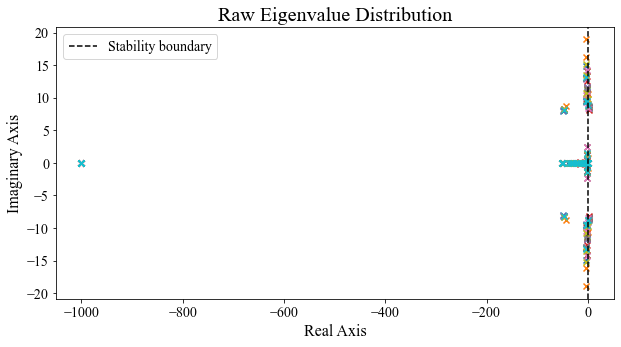

In [26]:
# Get a random sample of 10 scenarios (10 random numbers from 1 to 19185)
plot_scenarios = np.random.randint(1, df_eigenvalues.shape[1], 10)


# Plot the eigenvalues
fig, ax = plt.subplots(figsize = (10, 5))

#get the real and imaginary part of each eigenvalue
for sc in plot_scenarios:
    real_part = np.real(df_eigenvalues[f"Scenario {sc}"][:]) 
    imag_part = np.imag(df_eigenvalues[f"Scenario {sc}"][:])
    
    # Plotting the eigenvalue
    ax.scatter(real_part, imag_part, marker = 'x')

# Formatting axes
ax.set_title('Raw Eigenvalue Distribution', fontname = 'Times New Roman', fontsize = 20)
ax.set_xlabel('Real Axis', fontname = 'Times New Roman', fontsize = 16)
ax.set_ylabel('Imaginary Axis', fontname = 'Times New Roman', fontsize = 16)

# More formatting stuff
for tick in ax.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(14)
    
# Draw stability boundary
ax.axvline(x = 0, color = 'black', linestyle = '--', label = "Stability boundary")
ax.legend(prop = {'family' : 'Times New Roman', 'size' : 14})

# 2_data_preprocessing

### > Loading Organized Raw Data

In [27]:
#The organized, lebeled data that is saved on the 'df_eigenvalue.pkl' file
with open("_preproc_data/df_eigenvalues.pkl", 'rb') as f:
    df_eigenvalues = pickle.load(f)
#df_eigenvalues

In [28]:
#convert dataset to panda frame
#df = pd.DataFrame(eigs19branches)
#print(df)
#75% Dataset
#eigs19branches=df.head(14861)
#eigs19branches=eigs19branches.to_numpy()
#df_eigenvalues.head()

### > Normalizing Eigenvalues

In [29]:
# Creating new Pandas Dataframe for normalized eigenvalues
df_normalized_eigenvalues = pd.DataFrame([], columns = list(df_eigenvalues.columns.values))

# Unit circle normalization, using lamda function
# Function to normalize a single eigenvalue (scalar fcn)
# This has to be conditioned: only the eigs outside the unit circle will be normalized
norm_scalar = lambda eig : (eig / (np.abs(eig) + EPS) if np.abs(eig) >= 1 else eig)

# Vectorizing the lambda expression (vector elementwise fcn)
norm_vector = np.vectorize(norm_scalar)

In [30]:
# applying the lamda expression on the eigenvalue dataframe
for sc in list(df_eigenvalues.columns.values):
    df_normalized_eigenvalues[sc] = norm_vector(df_eigenvalues[sc][:])

# Saving the normalized eigenvalues
with open('_preproc_data/df_normalized_eigenvalues.pkl', 'wb') as f:
    pickle.dump(df_normalized_eigenvalues, f, pickle.HIGHEST_PROTOCOL)

### > Exploratory Data Analysis (after normalization)

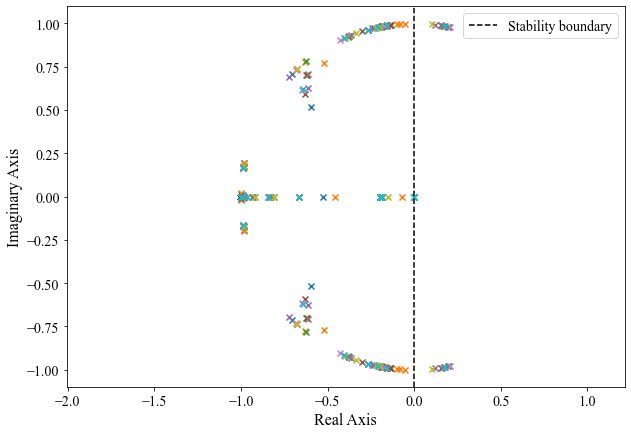

In [31]:
# Selecting 10 random scenarios
plot_scenarios = np.random.randint(1, df_normalized_eigenvalues.shape[1], 10)

# Plotting the eigenvalues for the scenarios
fig, ax = plt.subplots(figsize = (10, 7))

for sc in plot_scenarios:
    real_part = np.real(df_normalized_eigenvalues["Scenario {}".format(sc)][:])
    imag_part = np.imag(df_normalized_eigenvalues["Scenario {}".format(sc)][:])
    ax.scatter(real_part, imag_part, marker = 'x')

#ax.set_title('Normalized Eigenvalue Distribution', fontname = 'Times New Roman', fontsize = 20)
ax.set_xlabel('Real Axis', fontname = 'Times New Roman', fontsize = 16)
ax.set_ylabel('Imaginary Axis', fontname = 'Times New Roman', fontsize = 16)

for tick in ax.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(14)
    
ax.axvline(x = 0, color = 'black', linestyle = '--', label = 'Stability boundary') # Drawing stability boundary
ax.legend(prop = {'family' : 'Times New Roman', 'size' : 14})

ax.axes.set_aspect('equal', 'datalim')

In [32]:
# Hard-coded ground truth

# use the df_normalized_eigenvalues.pkl for creating ground truth
create_ground_truth(df_normalized_eigenvalues, os.getcwd(), 'normalized')
# the create_ground_truth.py under 'utilis' stores the detailed function

# Takes these data from the normalized eigen values
# uses built in function to get the stability (stable, unstable, etc.) from damping ratio
# store the actual results for validation

Ground truth data saved!

normalized Eigenvalues (shape): 49 (eigs) x 19815 (scenarios)
normalized Text labels (shape): 49 (eigs) x 19815 (scenarios)
normalized Damping ratio (shape): 49 (eigs) x 19815 (scenarios)
normalized Tag label (shape): 49 (eigs) x 19815 (scenarios)



In [33]:
# See the saved normalized ground truth data
# Loading normalized ground truth data
with open ("_preproc_data/normalized_ground_truth_data.pkl", 'rb') as f:
    normalized_ground_truth_data = pickle.load(f)
normalized_ground_truth_data

{'text_label': array([['Real, stable', 'Real, stable', 'Real, stable', ...,
         'Real, stable', 'Real, stable', 'Real, stable'],
        ['Real, stable', 'Real, stable', 'Real, stable', ...,
         'Real, stable', 'Real, stable', 'Real, stable'],
        ['Real, stable', 'Real, stable', 'Real, stable', ...,
         'Real, stable', 'Real, stable', 'Real, stable'],
        ...,
        ['Real, stable', 'Real, stable', 'Real, stable', ...,
         'Real, stable', 'Real, stable', 'Real, stable'],
        ['Real, stable', 'Real, stable', 'Real, stable', ...,
         'Real, stable', 'Real, stable', 'Real, stable'],
        ['Real, stable', 'Real, stable', 'Real, stable', ...,
         'Real, stable', 'Real, stable', 'Real, stable']], dtype=object),
 'damping_ratio': array([[1.1, 1.1, 1.1, ..., 1.1, 1.1, 1.1],
        [1.1, 1.1, 1.1, ..., 1.1, 1.1, 1.1],
        [1.1, 1.1, 1.1, ..., 1.1, 1.1, 1.1],
        ...,
        [1.1, 1.1, 1.1, ..., 1.1, 1.1, 1.1],
        [1.1, 1.1, 1.1, ...

# 3_data_preparation

### > Importing Libraries and Loading Preprocessed Data

In [34]:
# Loading normalized eigenvalues data
with open ("_preproc_data/df_normalized_eigenvalues.pkl", 'rb') as f:
    df_normalized_eigenvalues = pickle.load(f)

# Loading normalized ground truth data
with open ("_preproc_data/normalized_ground_truth_data.pkl", 'rb') as f:
    normalized_ground_truth_data = pickle.load(f)
    
# Extract the labels and the damping ratio
tag_labels = normalized_ground_truth_data['tag_label']
damping_ratio = normalized_ground_truth_data['damping_ratio']

### > Separating the Eigenvalues into Real and Imaginary Part

In [35]:
#Get total number of eigenvalue in each scenario
n_eigs = df_normalized_eigenvalues.shape[0]

#Get total number of scenarios
n_scenarios = df_normalized_eigenvalues.shape[1]

#Get normalized complex eigen value for each scenario converted to single vector
eigs_flatten = np.reshape(np.transpose(df_normalized_eigenvalues.values),
                         [n_eigs * n_scenarios, 1])

print(f"eigs_flatten (shape) = {eigs_flatten.shape}")

# ------------------------------
# INPUT
# ------------------------------

# Get the 'input features' and 'input labels'

# Initialize input features matrix
input_features = np.zeros(shape = (eigs_flatten.shape[0], 2))

# Populate the input features matrix with real and imaginary part of the eigenvalues
input_features[:, 0] = np.reshape(np.real(eigs_flatten), [eigs_flatten.shape[0], ])
input_features[:, 1] = np.reshape(np.imag(eigs_flatten), [eigs_flatten.shape[0], ])
print(f"input_features (shape) = {input_features.shape}")

# Flattening tag labels (ground truth)
input_labels = np.reshape(np.transpose(tag_labels), 
                          [tag_labels.shape[0] * tag_labels.shape[1], 1])
print(f"input_labels (shape) = {input_labels.shape}")

eigs_flatten (shape) = (970935, 1)
input_features (shape) = (970935, 2)
input_labels (shape) = (970935, 1)


### > Splitting data into Training and Testing Datasets

In [36]:
# INPUTS: input_features
# LABELS (of inputs): input_labels

# Extracting training and testing data using scikit-learn
X_train, X_test, Y_train, Y_test = train_test_split(input_features, 
                                                    input_labels, 
                                                    random_state = 0)

print(f"Train data (shape) = {X_train.shape}")
print(f"Train labels (shape) = {Y_train.shape}")
print(f"Test data (shape) = {X_test.shape}")
print(f"Test labels (shape) = {Y_test.shape}")

Train data (shape) = (728201, 2)
Train labels (shape) = (728201, 1)
Test data (shape) = (242734, 2)
Test labels (shape) = (242734, 1)


In [37]:
Y_train[0]

array([5.])

### > Converting the Labels to One-Hot Encoding
See the details here <https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/>

In [38]:
# Converting labels to one-hot using scikit-learn
# Label Binarizer is an SciKit Learn class that accepts Categorical data as input and returns an Numpy array
lb = LabelBinarizer()

# np.float64 is a fixed-sized float value (always 64bit)  
# It means that each value in the numpy array would be a float of size 64
T_train = np.float64(lb.fit_transform(Y_train))
T_train = np.float64(lb.transform(Y_train))

T_test = np.float64(lb.fit_transform(Y_test))
T_test = np.float64(lb.transform(Y_test))

print(f"Train labels (one-hot encoding - shape): {T_train.shape}")
print(f"Test labels (one-hot encoding - shape): {T_test.shape}")

Train labels (one-hot encoding - shape): (728201, 6)
Test labels (one-hot encoding - shape): (242734, 6)


In [39]:
T_train[0]

array([0., 0., 0., 0., 1., 0.])

### > Compensating Skewed Dataset
See the details here <https://builtin.com/data-science/skewed-data>

In [40]:
# Taking the same amount of eigenvalues for each category
unique, counts = np.unique(Y_train, return_counts = True)
print(dict(zip(unique, counts)))

{1.0: 36843, 2.0: 25312, 3.0: 5686, 4.0: 207371, 5.0: 439513, 6.0: 13476}


In [41]:
# Getting the indices for the elements with the same category in the training data
numeigs_1 = np.where(Y_train == 1)
numeigs_1 = np.array(numeigs_1)
numeigs_1 = numeigs_1[0, :]

numeigs_2 = np.where(Y_train == 2)
numeigs_2 = np.array(numeigs_2)
numeigs_2 = numeigs_2[0, :]

numeigs_3 = np.where(Y_train == 3)
numeigs_3 = np.array(numeigs_3)
numeigs_3 = numeigs_3[0, :]

numeigs_4 = np.where(Y_train == 4)
numeigs_4 = np.array(numeigs_4)
numeigs_4 = numeigs_4[0, :]

numeigs_5 = np.where(Y_train == 5)
numeigs_5 = np.array(numeigs_5)
numeigs_5 = numeigs_5[0, :]

numeigs_6 = np.where(Y_train == 6)
numeigs_6 = np.array(numeigs_6)
numeigs_6 = numeigs_6[0, :]

In [42]:
# Randomizing indices
numeigs_r_1 = np.random.choice(numeigs_1, np.amin(counts))
numeigs_r_2 = np.random.choice(numeigs_2, np.amin(counts))
numeigs_r_3 = np.random.choice(numeigs_3, np.amin(counts))
numeigs_r_4 = np.random.choice(numeigs_4, np.amin(counts))
numeigs_r_5 = np.random.choice(numeigs_5, np.amin(counts))
numeigs_r_6 = np.random.choice(numeigs_6, np.amin(counts))

### > Creating Reduced Training/Testing Datasets

In [43]:
# Only get the data associated with the radomized indices to reduce skewness
X_train_red = np.concatenate((X_train[numeigs_r_1, ...],
                             X_train[numeigs_r_2, ...], X_train[numeigs_r_3, ...], 
                             X_train[numeigs_r_4, ...], X_train[numeigs_r_5, ...], 
                             X_train[numeigs_r_6, ...]), axis = 0)
print(f" X_train_red (shape) = {X_train_red.shape}")

Y_train_red = np.concatenate((Y_train[numeigs_r_1, ...],
                             Y_train[numeigs_r_2, ...], Y_train[numeigs_r_3, ...], 
                             Y_train[numeigs_r_4, ...], Y_train[numeigs_r_5, ...], 
                             Y_train[numeigs_r_6, ...]), axis = 0)
print(f" Y_train_red (shape) = {Y_train_red.shape}")

T_train_red = np.concatenate((T_train[numeigs_r_1, ...],
                             T_train[numeigs_r_2, ...], T_train[numeigs_r_3, ...], 
                             T_train[numeigs_r_4, ...], T_train[numeigs_r_5, ...], 
                             T_train[numeigs_r_6, ...]), axis = 0)
print(f" T_train_red (shape) = {T_train_red.shape}")

 X_train_red (shape) = (34116, 2)
 Y_train_red (shape) = (34116, 1)
 T_train_red (shape) = (34116, 6)


In [44]:
# normalized the reduced testing and training data
normalized_testing_training_data_red = {'X_train' : X_train,
                                        'Y_train' : Y_train,
                                        'T_train' : T_train,
                                       'X_train_red' : X_train_red,
                                       'Y_train_red' : Y_train_red,
                                       'T_train_red' : T_train_red,
                                       'X_test' : X_test,
                                       'Y_test' : Y_test,
                                       'T_test' : T_test}

with open('_preproc_data/normalized_testing_training_data_red_.pkl', 'wb') as f:
    pickle.dump(normalized_testing_training_data_red, f, pickle.HIGHEST_PROTOCOL)

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression algorithm
log_reg = LogisticRegression(solver = 'lbfgs', C = 10)

log_reg.fit(X_train_red, Y_train_red)

C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10)

In [46]:
# Getting predictions
Y_pred = log_reg.predict(X_test)

# Computing precision
precision_score(Y_test, Y_pred, average = 'macro')

0.6806179679737339

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


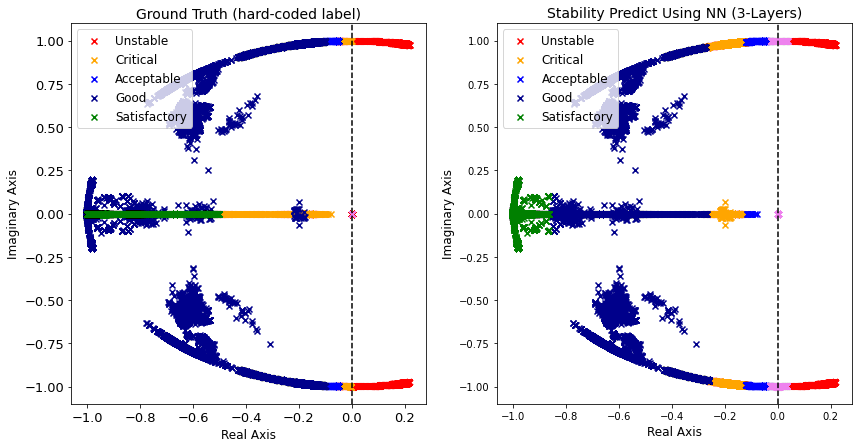

In [47]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "Softmax Regression", fontname = "Times")
# the prediction_plotting.py under 'utilis' stores the detailed function

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy:',accuracy_score(Y_test, Y_pred))
print('Precision:',precision_score(Y_test, Y_pred, average = 'macro'))
print('Recall:',recall_score(Y_test, Y_pred, average = 'macro'))
from sklearn.metrics import f1_score
print('F1-score:',f1_score(Y_test, Y_pred, average = 'macro'))

import time    # this is an inbuilt library in Python
start_time = time.time()
Y_pred = log_reg.predict(X_test)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Accuracy: 0.7804922260581542
Precision: 0.6806179679737339
Recall: 0.8299470384723397
F1-score: 0.6898369939235182
Execution time:  0.025932788848876953 secs


## Linear Support Vector Machines

In [49]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C = 10, loss = 'hinge', max_iter = 200000)

svm_clf.fit(X_train_red, Y_train_red)

svm_clf = LinearSVC(C = 10, loss = 'hinge', max_iter = 200000)

svm_clf.fit(X_train_red, Y_train_red)

C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=10, loss='hinge', max_iter=200000)

In [50]:
Y_pred = svm_clf.predict(X_test)

precision_score(Y_test, Y_pred, average = 'macro')

C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5591424043650385

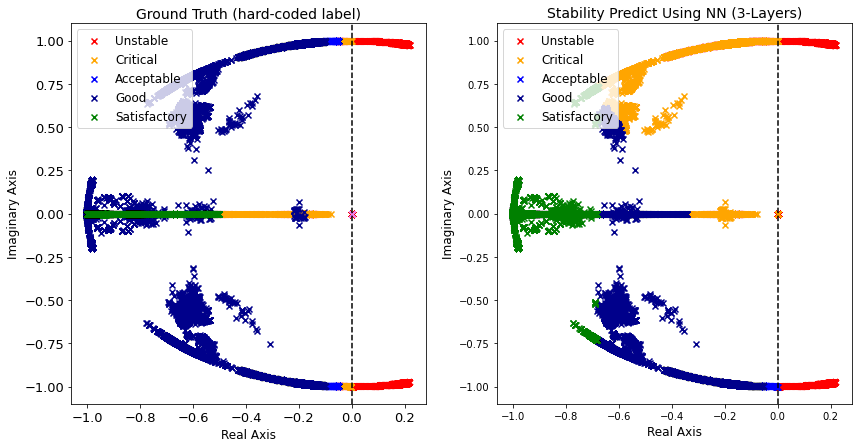

In [51]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "SVM", fontname = "Times")
# the prediction_plotting.py under 'utilis' stores the detailed function

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy:',accuracy_score(Y_test, Y_pred))
print('Precision:',precision_score(Y_test, Y_pred, average = 'macro'))
print('Recall:',recall_score(Y_test, Y_pred, average = 'macro'))

from sklearn.metrics import f1_score
print('F1-score:',f1_score(Y_test, Y_pred, average = 'macro'))

import time    # this is an inbuilt library in Python
start_time = time.time()
Y_pred = svm_clf.predict(X_test)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


Accuracy: 0.7858025657715854
Precision: 0.5591424043650385


C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.5799177560706753
F1-score: 0.5008441717006541
Execution time:  0.015621423721313477 secs


## k-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Loop to select the `n_neighbors` hyperparameter
for n in range(1, 6):
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train_red, Y_train_red)
    print(f"n_neighbors = {n}")
    # Training accuracy
    print(f"Training accuracy: {clf.score(X_train_red, Y_train_red)}")

C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors = 1
Training accuracy: 1.0
n_neighbors = 2


C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy: 0.9998241294407316
n_neighbors = 3


C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy: 0.9995896353617071
n_neighbors = 4


C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy: 0.999531011841951
n_neighbors = 5


C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy: 0.9993258295228046


In [54]:
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train_red, Y_train_red)

C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [55]:
t_0 = time.time()
Y_pred = clf.predict(X_test)
t_f = time.time() - t_0
print(t_f)

precision_score(Y_test, Y_pred, average = 'macro')

18.069657802581787


0.9960568583484174

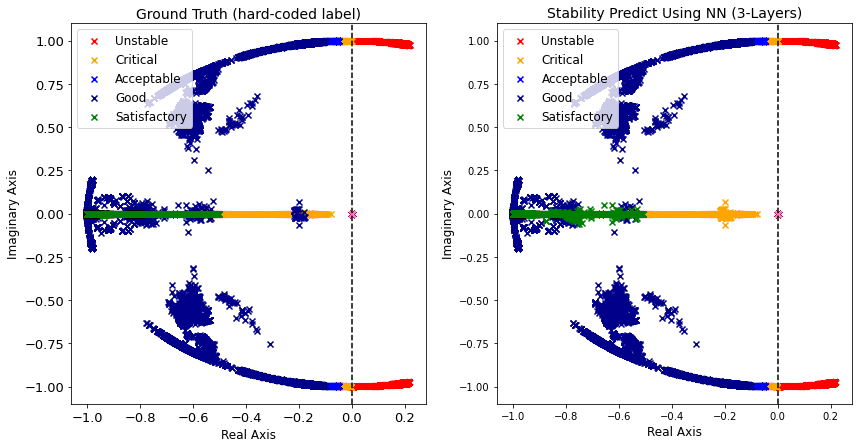

In [56]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "k-NN", fontname = "Times")
# the prediction_plotting.py under 'utilis' stores the detailed function

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy:',accuracy_score(Y_test, Y_pred))
print('Precision:',precision_score(Y_test, Y_pred, average = 'macro'))
print('Recall:',recall_score(Y_test, Y_pred, average = 'macro'))

from sklearn.metrics import f1_score
print('F1-score:',f1_score(Y_test, Y_pred, average = 'macro'))

import time    # this is an inbuilt library in Python
start_time = time.time()
Y_pred = clf.predict(X_test)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


Accuracy: 0.9985004160933367
Precision: 0.9960568583484174
Recall: 0.9991455427161888
F1-score: 0.9975922547212074
Execution time:  11.240909337997437 secs


## Decision Trees

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Loop for selecting the `max_depth` hyperparameter
for max_d in range(1, 10):
    tree = DecisionTreeClassifier(max_depth = max_d, random_state = 0)
    tree.fit(X_train_red, Y_train_red)
    print(f"Depth: {max_d}")
    print(f"Training accuracy: {tree.score(X_train_red, Y_train_red)}")

Depth: 1
Training accuracy: 0.3333333333333333
Depth: 2
Training accuracy: 0.6285027553054285
Depth: 3
Training accuracy: 0.7923554930238011
Depth: 4
Training accuracy: 0.8956501348340954
Depth: 5
Training accuracy: 0.9188357368976433
Depth: 6
Training accuracy: 0.9378590690585062
Depth: 7
Training accuracy: 0.9618067768788838
Depth: 8
Training accuracy: 0.9618067768788838
Depth: 9
Training accuracy: 0.9618360886387619


In [59]:
tree = DecisionTreeClassifier(max_depth = 7, random_state = 0)
tree.fit(X_train_red, Y_train_red)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [60]:
t_0 = time.time()
Y_pred = tree.predict(X_test)
t_f = time.time() - t_0

print(t_f)

precision_score(Y_test, Y_pred, average = 'macro')

0.015508413314819336


0.9330557540779032

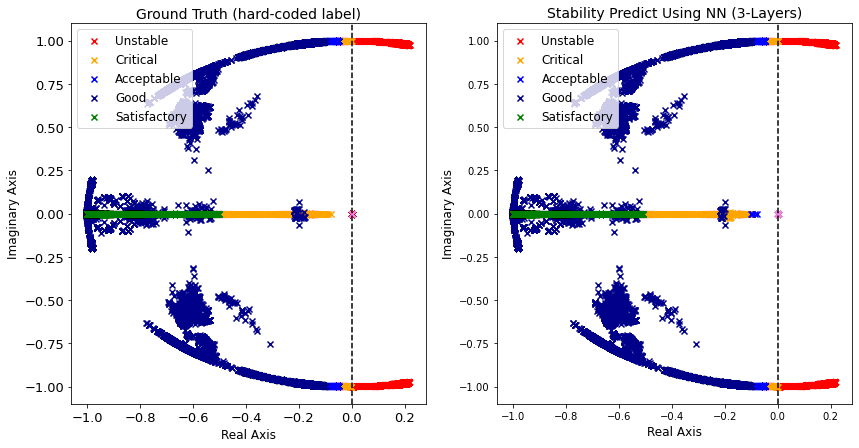

In [61]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "Decision Trees", fontname = "Times")
# the prediction_plotting.py under 'utilis' stores the detailed function

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy:',accuracy_score(Y_test, Y_pred))
print('Precision:',precision_score(Y_test, Y_pred, average = 'macro'))
print('Recall:',recall_score(Y_test, Y_pred, average = 'macro'))

from sklearn.metrics import f1_score
print('F1-score:',f1_score(Y_test, Y_pred, average = 'macro'))

import time    # this is an inbuilt library in Python
start_time = time.time()
Y_pred = tree.predict(X_test)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


Accuracy: 0.9880568853147891
Precision: 0.9330557540779032
Recall: 0.961967103322101
F1-score: 0.9372856615910009
Execution time:  0.015622377395629883 secs


## Naïve-Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_red, Y_train_red)

C:\Users\Admin\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [64]:
t_0 = time.time()
Y_pred = gnb.predict(X_test)
t_f = time.time() - t_0

print(t_f)

precision_score(Y_test, Y_pred, average = 'macro')

0.0937337875366211


0.8621149143312109

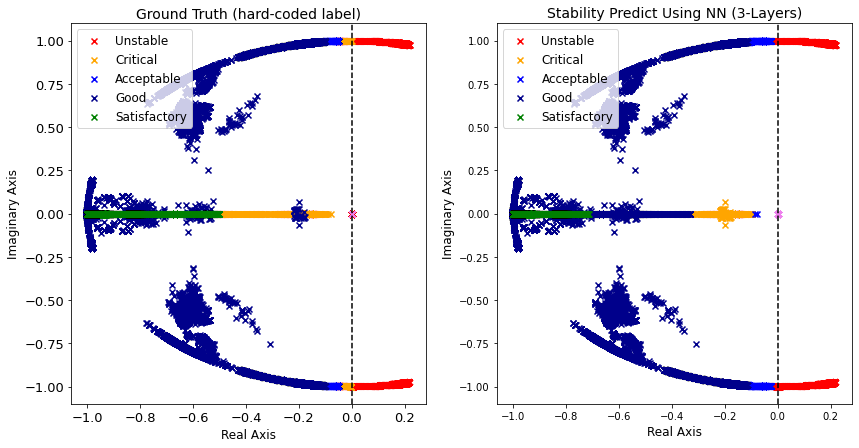

In [65]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "Naïve-Bayes", fontname = "Times")
# the prediction_plotting.py under 'utilis' stores the detailed function

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy:',accuracy_score(Y_test, Y_pred))
print('Precision:',precision_score(Y_test, Y_pred, average = 'macro'))
print('Recall:',recall_score(Y_test, Y_pred, average = 'macro'))

from sklearn.metrics import f1_score
print('F1-score:',f1_score(Y_test, Y_pred, average = 'macro'))

import time    # this is an inbuilt library in Python
start_time = time.time()
Y_pred = gnb.predict(X_test)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


Accuracy: 0.9705768454357445
Precision: 0.8621149143312109
Recall: 0.9390755197797299
F1-score: 0.8825629519468056
Execution time:  0.09493279457092285 secs


## Random Forests

In [70]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_red, Y_train_red)

Y_pred=clf.predict(X_test)

C:\Users\Admin\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [71]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_red, Y_train_red)

Y_pred=clf.predict(X_test)

# Evaluate model parameters
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy:',accuracy_score(Y_test, Y_pred))
print('Precision:',precision_score(Y_test, Y_pred, average = 'macro'))
print('Recall:',recall_score(Y_test, Y_pred, average = 'macro'))

from sklearn.metrics import f1_score
print('F1-score:',f1_score(Y_test, Y_pred, average = 'macro'))

import time    # this is an inbuilt library in Python
start_time = time.time()
Y_pred = clf.predict(X_test)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Accuracy: 0.9881392800349353
Precision: 0.9335241578894452
Recall: 0.9621201245246982
F1-score: 0.9376589273272443
Execution time:  1.797558069229126 secs


## Building the NN Model - 3 layer (1 hidden)

### > Understand the parameters

In [31]:
# call keras framework
from tensorflow import keras
# initiate a sequentia keras neural model
model = keras.models.Sequential()

# First layer (input layer)
model.add(keras.layers.Dense(100,  # neuron size in this layer
                             activation = "selu",  # activation function
                             kernel_initializer = 'lecun_normal', 
                             bias_initializer = 'zeros'))
model.add(keras.layers.Dropout(rate = 0.25)) # Dropout layer (rate = 25%), dropout reduces overfitting

# Second layer (hiden layer)
model.add(keras.layers.Dense(100, # neuron size in this layer
                             activation = "selu", # activation function
                             kernel_initializer = 'lecun_normal', 
                             bias_initializer = 'zeros'))

# Third layer (output layer)
model.add(keras.layers.Dense(6, activation = "softmax"))

model.build(input_shape = [None, 2])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 6)                 606       
                                                                 
Total params: 11,006
Trainable params: 11,006
Non-trainable params: 0
_________________________________________________________________


In [56]:
filepath = os.path.abspath(os.path.join(os.getcwd(), '_nn_model', 'eigs_classification.hdf5'))

callbacks = [keras.callbacks.ModelCheckpoint(filepath = filepath, 
                                             monitor = 'loss', 
                                             mode = 'min', save_best_only = True, verbose = 1)]

model.compile(loss = "categorical_crossentropy", 
              optimizer = "Adam", 
              metrics = ["accuracy"])
history = model.fit(X_train_red, T_train_red, epochs = 100, callbacks = callbacks)
#history = model.fit(X_train_red, T_train_red, validation_split=0.33, epochs = 100, callbacks = callbacks)

Epoch 1/100
700/715 [============================>.] - ETA: 0s - loss: 0.0206 - accuracy: 0.9935
Epoch 1: loss improved from inf to 0.02077, saving model to C:\Users\Admin\IEEE14_BusSystem-main\_nn_model\eigs_classification.hdf5
715/715 [==============================] - 3s 3ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 3.9033 - val_accuracy: 0.4929
Epoch 2/100
703/715 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9951
Epoch 2: loss improved from 0.02077 to 0.01785, saving model to C:\Users\Admin\IEEE14_BusSystem-main\_nn_model\eigs_classification.hdf5
715/715 [==============================] - 2s 3ms/step - loss: 0.0178 - accuracy: 0.9950 - val_loss: 4.6981 - val_accuracy: 0.4937
Epoch 3/100
701/715 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9948
Epoch 3: loss did not improve from 0.01785
715/715 [==============================] - 2s 3ms/step - loss: 0.0184 - accuracy: 0.9947 - val_loss: 5.2561 - val_accuracy: 0.4926
Epoch

713/715 [============================>.] - ETA: 0s - loss: 0.0141 - accuracy: 0.9955
Epoch 58: loss improved from 0.01455 to 0.01415, saving model to C:\Users\Admin\IEEE14_BusSystem-main\_nn_model\eigs_classification.hdf5
715/715 [==============================] - 2s 3ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 13.4563 - val_accuracy: 0.4926
Epoch 59/100
697/715 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9949
Epoch 59: loss did not improve from 0.01415
715/715 [==============================] - 2s 3ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 13.1998 - val_accuracy: 0.4855
Epoch 60/100
700/715 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9950
Epoch 60: loss did not improve from 0.01415
715/715 [==============================] - 2s 3ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 12.7291 - val_accuracy: 0.4924
Epoch 61/100
690/715 [===========================>..] - ETA: 0s - loss: 0.0170 - accuracy: 0.9947


### > Prediction with the NN Classifier

In [34]:
model.load_weights(filepath)

scores = model.evaluate(X_test, keras.utils.to_categorical(Y_test - 1))

7586/7586 [==============================] - 11s 1ms/step - loss: 0.0651 - accuracy: 0.9822


In [63]:
history_2=model.evaluate(X_test, keras.utils.to_categorical(Y_test - 1))[1]

7586/7586 [==============================] - 10s 1ms/step - loss: 2.0628 - accuracy: 0.3762


In [38]:
# Probability of the input to belong to each of the classes
Y_logits = model.predict(X_test) 
Y_pred = np.argmax(Y_logits, axis = 1) + 1

In [39]:
Y_pred

array([5, 5, 5, ..., 5, 5, 1], dtype=int64)

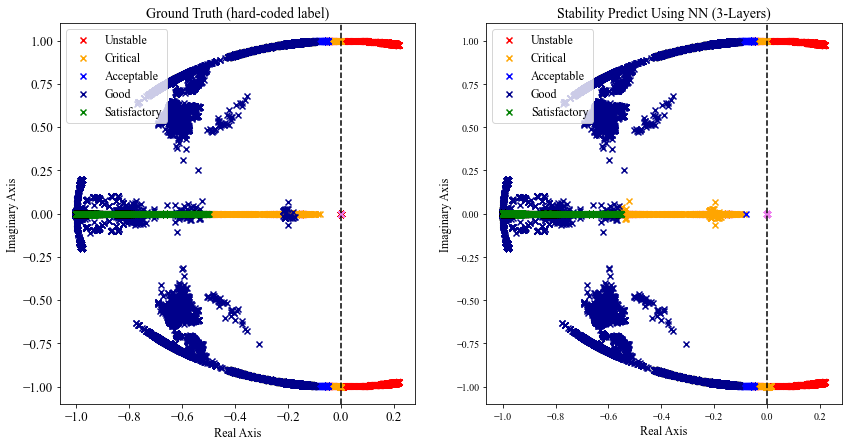

In [40]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "NN - 3 Layer", fontname = "Times New Roman")
# the prediction_plotting.py under 'utilis' stores the detailed function

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy:',accuracy_score(Y_test, Y_pred))
print('Precision:',precision_score(Y_test, Y_pred, average = 'macro'))
print('Recall:',recall_score(Y_test, Y_pred, average = 'macro'))
from sklearn.metrics import f1_score
print('F1-score:',f1_score(Y_test, Y_pred, average = 'macro'))

import time    # this is an inbuilt library in Python
start_time = time.time()
model.evaluate(X_test, keras.utils.to_categorical(Y_test - 1))
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Accuracy: 0.9821656628243263
Precision: 0.8984461618933323
Recall: 0.957248979603698
F1-score: 0.9159401657989984
7586/7586 [==============================] - 11s 1ms/step - loss: 2.0628 - accuracy: 0.3762
Execution time:  11.191356182098389 secs


In [59]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# Get required Epoch number

#Use this in NN_training
#history = model.fit(X_train_red, T_train_red, validation_split=0.33, epochs = 100, callbacks = callbacks)

#Get history dictionary
#history_dict = history.history
#print(history_dict.keys())

#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('Model Accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Training', 'Validation'], loc='lower right')

#plt.plot(history.history['loss'])
#plt.plot(scores.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Val'], loc='upper right')
#plt.show()

AttributeError: 'list' object has no attribute 'history'

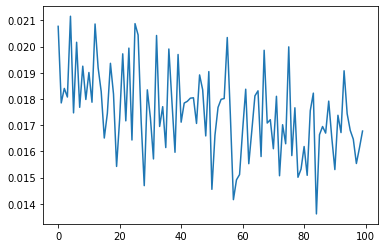